# Customer Churn Prediction and Analysis 📉

## 1. Project Overview

This project focuses on analyzing and predicting customer churn for a telecommunications company. Churn is defined as a customer canceling their subscription. Predicting which customers are at risk of churning is critical for retaining high-value users and maximizing business revenue.

## 2. Dataset and Goal

* **Dataset:** Contains 7,043 customer records with 21 features, including customer demographics (gender, age), account information (tenure, contract type), and services subscribed to (internet, phone).
* **Goal:** To build a robust machine learning model that accurately identifies customers likely to churn and provide actionable business recommendations based on the key drivers of churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. Data Cleaning and Preprocessing

The initial check revealed that `TotalCharges` is currently an object (string) and contains some missing values (encoded as spaces). We will handle these by converting the column to a numeric type, dropping the `customerID` as it's not a predictive feature, and correcting the `SeniorCitizen` column for better interpretability.

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

### convert value of senior citizen with Yes or No

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Exploratory Data Analysis (EDA)

EDA helps us understand the relationship between features and the target variable, 'Churn'. We will look at tenure, contract type, and key services.

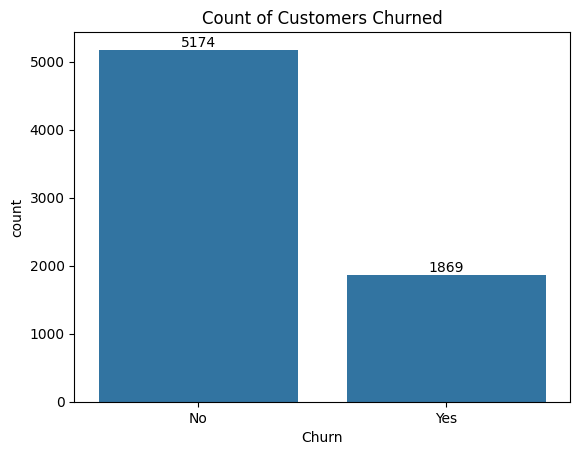

In [13]:
#Count of Customers Churned
ax = sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Churned")
plt.show()

#### The Count of Customer Churned as per Dataset is 1869. And the count of Customer who retained services is 5174.

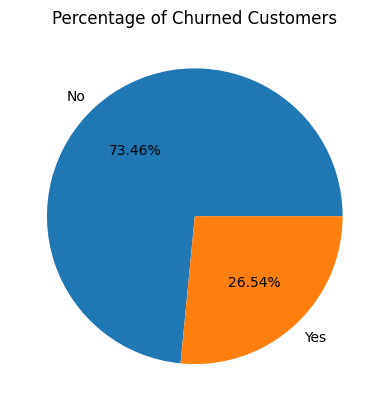

In [14]:
#Percentage of Churned Customers
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

#### As per Data, 26.54 % of Customers Have Churned Out

## Exploratory Analysis for Customer Churn

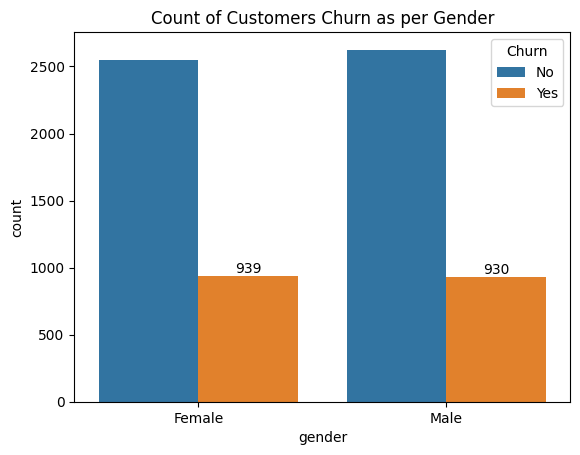

In [15]:
#Count of Customers Churn as per Gender
ax = sns.countplot(x='gender', data=df, hue='Churn')
ax.bar_label(ax.containers[1])
plt.title("Count of Customers Churn as per Gender")
plt.show()

Count of Customers Churn as per Gender shows that the Female and Male customer Churned as per data is 939 and 930 respectively.

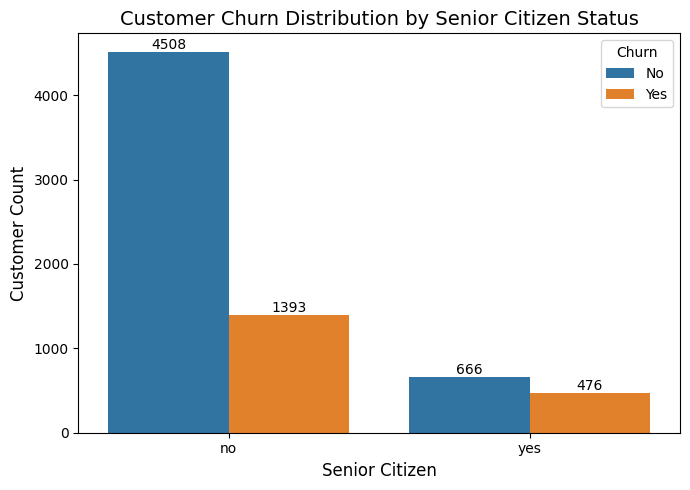

In [17]:
# 1. Ensure 'SeniorCitizen' is descriptive (0/1 to 'No'/'Yes' is assumed from your file's steps)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

plt.figure(figsize=(7, 5))

# 2. Add the 'Churn' column as 'hue' to split the bars
ax = sns.countplot(x="SeniorCitizen", data=df, hue='Churn')

# 3. Use a clear, descriptive title
plt.title("Customer Churn Distribution by Senior Citizen Status", fontsize=14)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)

# 4. Label all bars (essential for precise comparison)
for container in ax.containers:
    ax.bar_label(container)

plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

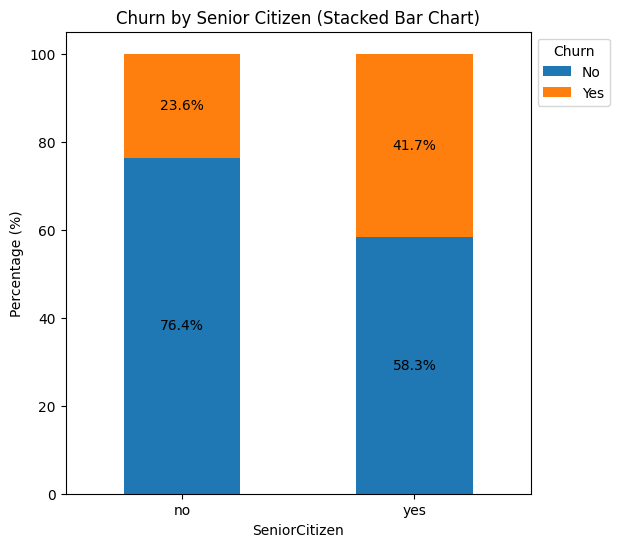

In [18]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (1,1))  # Customize legend location

plt.show()

### A Signigicant Percentage of Senior Citizens have Churned Out

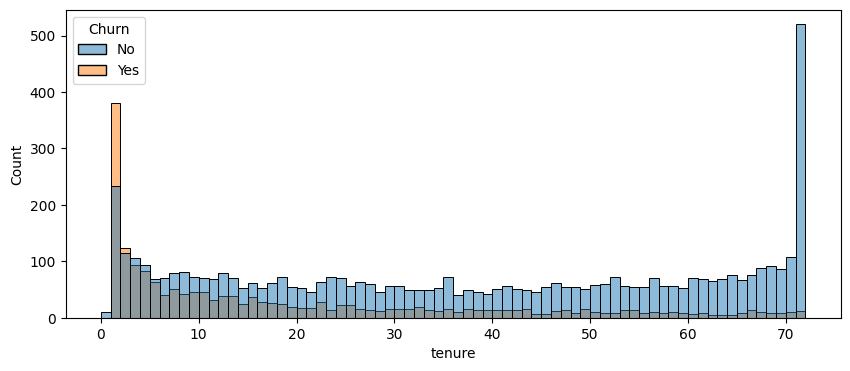

In [19]:
#chart of churn by tenure
plt.figure(figsize=(10,4))
sns.histplot(x='tenure', data=df, bins=72, hue="Churn")
plt.show()

#### Long Time Users are Stayed and Short Time Users have Churned within 1 or 2 months.

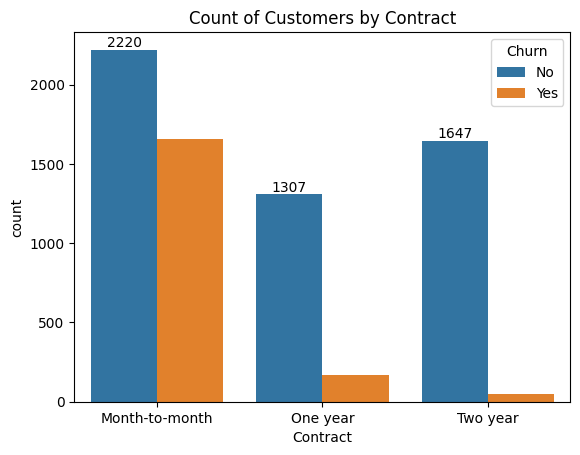

In [20]:
#Count of Customers by Contract
ax = sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#### Users with Month-to-Month Contract are Likely to Churn More as Compared to Other Contracts like One Year or Two Year

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

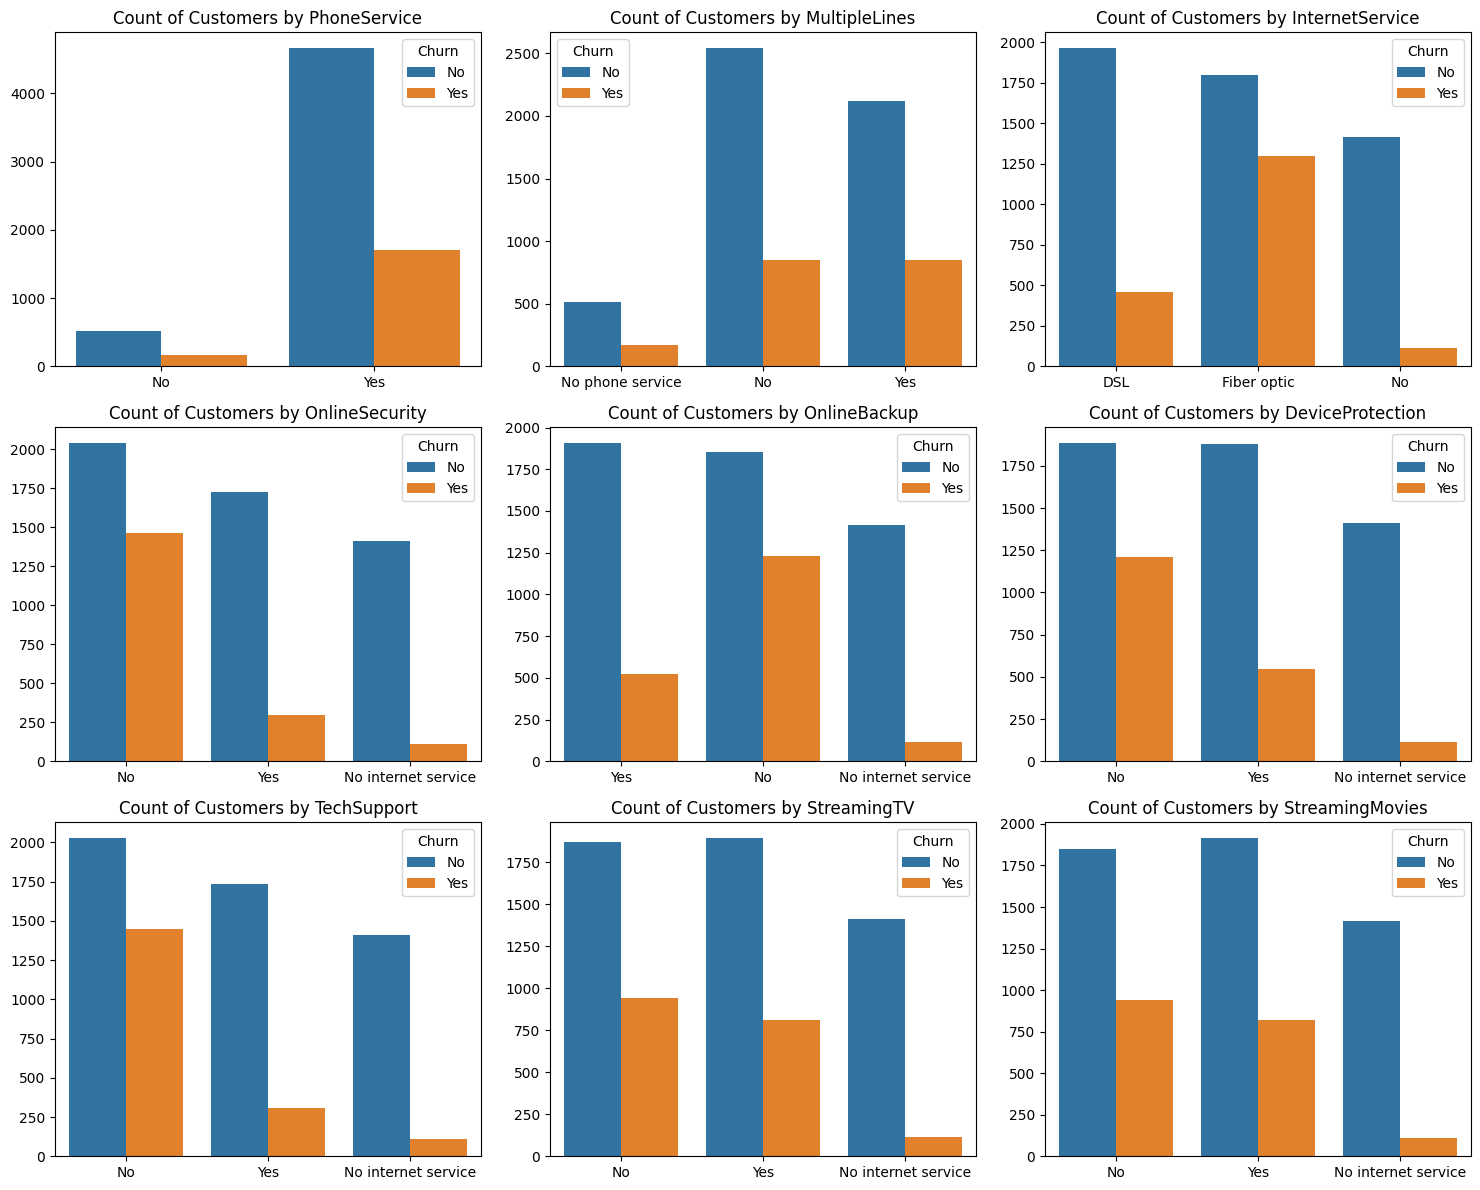

In [22]:
# List of columns for which we want to create count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and the axes to create count plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count of Customers by {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


#### Above charts shows the count of customer churned as per various features

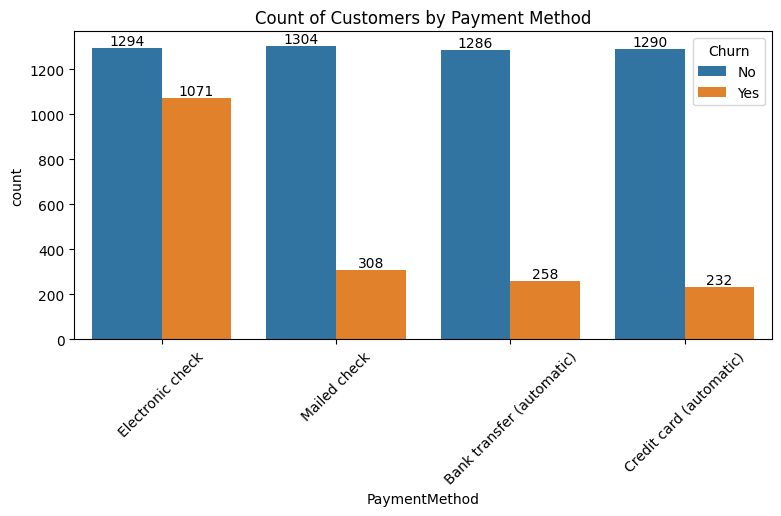

In [23]:
#Count of Customers by Payment Method
plt.figure(figsize=(9,4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Count of Customers by Payment Method")
plt.show()

### Count of Customers by Various Payment Method

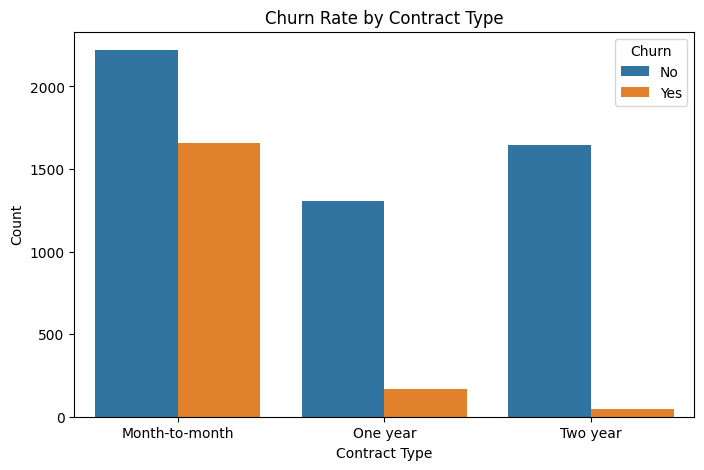

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

#### This plot clearly shows that month-to-month contracts have the highest churn rate by a significant margin. Long-term contracts (One year, Two year) are excellent retention mechanisms.

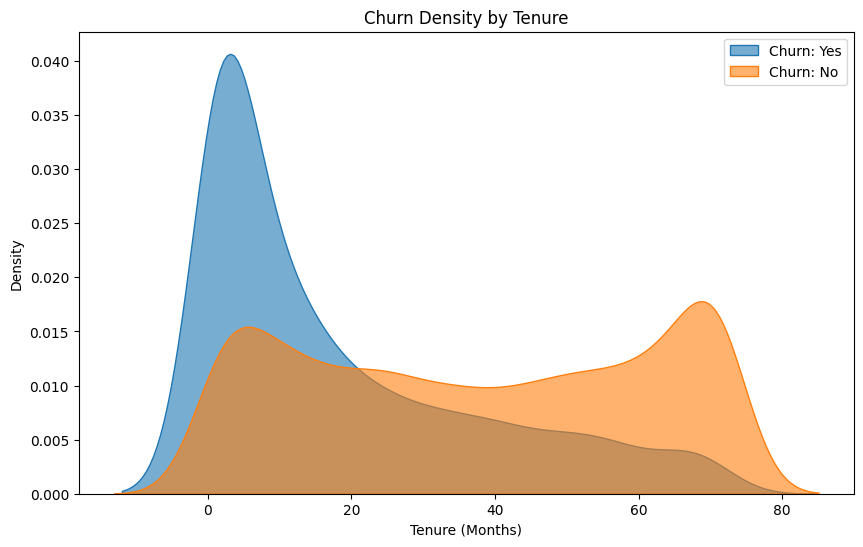

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churn: Yes', fill=True, alpha=0.6)
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='Churn: No', fill=True, alpha=0.6)
plt.title('Churn Density by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()
plt.show()

#### The density plot shows that churn is heavily concentrated among customers with very short tenure (less than 10 months). The longer a customer stays, the less likely they are to churn.

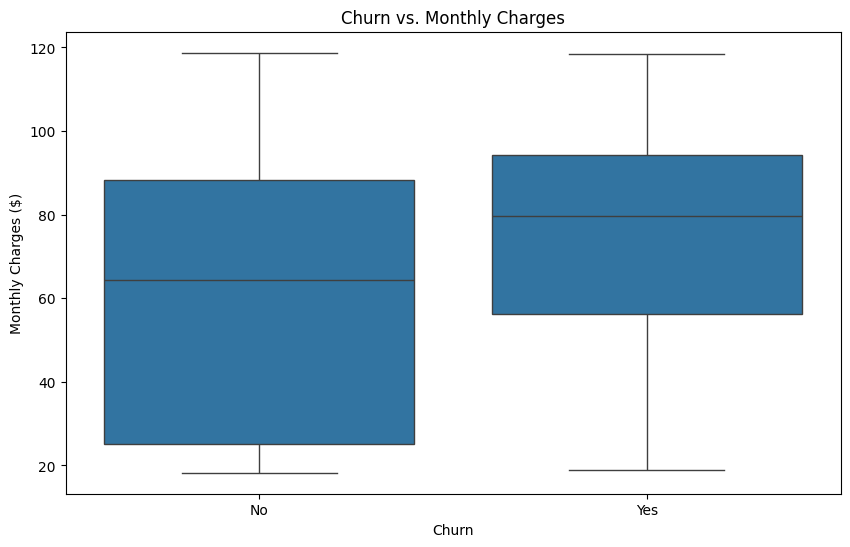

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

### Customers who churn (Yes) tend to have significantly higher median Monthly Charges than those who do not churn (No). This suggests high-cost, short-term contracts are a major risk factor.

## 5. Predictive Modeling

We will use a **Pipeline** to streamline the preprocessing steps and train a **Random Forest Classifier**. This is a robust approach for a portfolio project, ensuring correct handling of categorical and numerical features.

In [28]:
# Convert target variable 'Churn' to numeric (0 and 1)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

X = df.drop('Churn', axis=1)
y = df['Churn']

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\947112665.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Train samples: 5634
Test samples: 1409


In [31]:
# Identify feature types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline with a Random Forest Classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [32]:
# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_pipeline.predict(X_test)

## 6. Model Evaluation and Feature Importance

We evaluate the model using standard classification metrics. For churn, **Recall** is critical, as minimizing **False Negatives** (customers who churn but the model predicts won't) saves the most revenue.

In [33]:
print("--- Model Performance Metrics ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# Note the Recall for the Churn class (1)

--- Model Performance Metrics ---
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1035
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7921


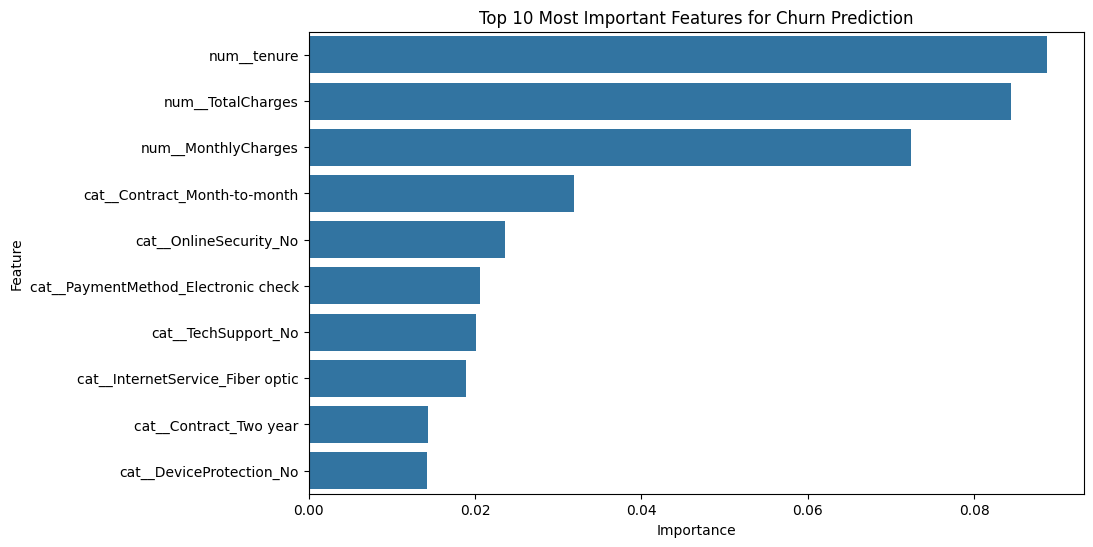

In [34]:
# Get feature names after OneHotEncoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get importances from the trained Random Forest model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 10 Most Important Features for Churn Prediction')
plt.show()

## List the top 3-4 features and explain their business implication (e.g., 'Contract_Month-to-month' is the most important driver, indicating contract strategy is key).

## 7. Conclusion and Business Recommendations

### Model Summary
The Random Forest model achieved an **79.21%** accuracy, but more importantly, a **48%** recall for the churn class. The most critical features driving churn are **Tenure, Total Charges and Monthly Charges**.

### Actionable Business Recommendations (Based on EDA & Feature Importance)

1.  **Target Short-Term Customers:** Focus retention efforts on customers with **Tenure under 10 months**. Offer them promotional discounts, onboarding support, or personalized follow-ups during this high-risk period.
2.  **Eliminate Month-to-Month Dependency:** The **Month-to-month Contract** is the strongest predictor of churn. Incentivize customers to upgrade to **One- or Two-year Contracts** using discounts, reduced monthly rates, or bundled services.
3.  **Address High-Value/High-Risk Segments:** Customers with **higher Monthly Charges** are more likely to churn. This group is likely paying for premium services (Fiber Optic, multiple add-ons). Ensure their service quality and support match the premium price they are paying.
4.  **Investigate Payment Friction:** The initial EDA suggested that the **Electronic Check** payment method may be associated with higher churn (you should confirm this with the feature importance). Investigate the user experience for this payment method immediately.